In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('student_performances.csv')
data.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


In [5]:
data.shape

(99, 10)

In [6]:
data.dtypes

Age                                       int64
Gender                                   object
AcademicPerformance                      object
TakingNoteInClass                        object
DepressionStatus                         object
FaceChallangesToCompleteAcademicTask     object
LikePresentation                         object
SleepPerDayHours                          int64
NumberOfFriend                          float64
LikeNewThings                            object
dtype: object

In [7]:
data.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64

In [8]:
data['NumberOfFriend'] = data['NumberOfFriend'].fillna(method='ffill')


C:\Users\ADMIN 4\AppData\Local\Temp\ipykernel_8804\3880711782.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['NumberOfFriend'] = data['NumberOfFriend'].fillna(method='ffill')


In [9]:
data.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          1
LikeNewThings                           0
dtype: int64

In [10]:
data = data.fillna(0)


In [11]:
data.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          0
LikeNewThings                           0
dtype: int64

# Data Preprocessing and Visualization

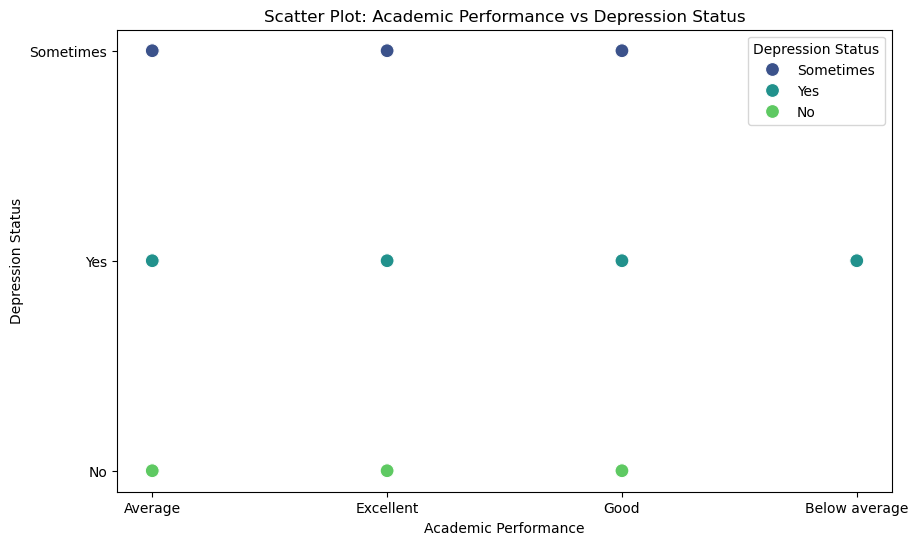

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns  


plt.figure(figsize=(10, 6))

sns.scatterplot(x='AcademicPerformance', y='DepressionStatus', data=data, hue='DepressionStatus', palette='viridis', s=100)

plt.title('Scatter Plot: Academic Performance vs Depression Status')
plt.xlabel('Academic Performance')
plt.ylabel('Depression Status')
plt.legend(title='Depression Status')

plt.show()


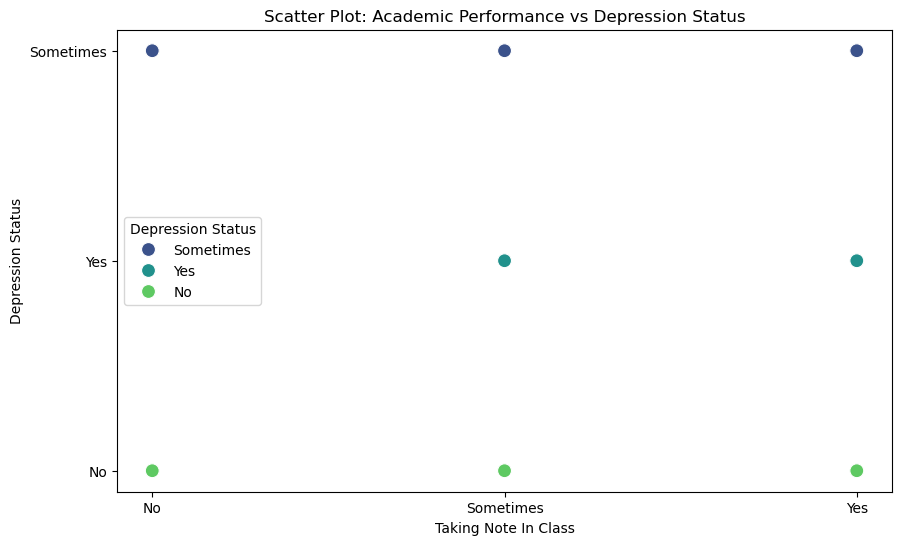

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  


plt.figure(figsize=(10, 6))

sns.scatterplot(x='TakingNoteInClass', y='DepressionStatus', data=data, hue='DepressionStatus', palette='viridis', s=100)

plt.title('Scatter Plot: Academic Performance vs Depression Status')
plt.xlabel('Taking Note In Class')
plt.ylabel('Depression Status')
plt.legend(title='Depression Status')

plt.show()


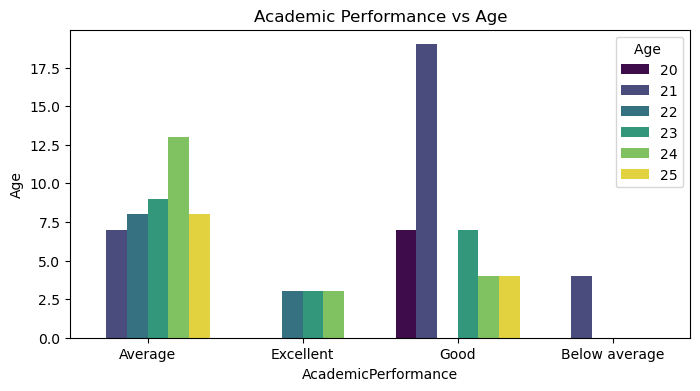

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data, x='AcademicPerformance', hue='Age ', palette='viridis')

plt.title('Academic Performance vs Age')
plt.xlabel('AcademicPerformance')
plt.ylabel('Age')
plt.show()

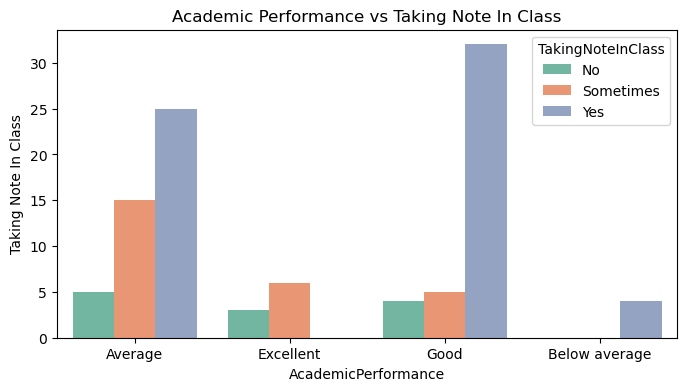

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data, x='AcademicPerformance', hue='TakingNoteInClass', palette='Set2')

plt.title('Academic Performance vs Taking Note In Class')
plt.xlabel('AcademicPerformance')
plt.ylabel('Taking Note In Class')
plt.show()

C:\Users\ADMIN 4\AppData\Local\Temp\ipykernel_8804\1315551639.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=sleep_means.index, y=sleep_means, palette='coolwarm', ci='sd')
C:\Users\ADMIN 4\AppData\Local\Temp\ipykernel_8804\1315551639.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_means.index, y=sleep_means, palette='coolwarm', ci='sd')


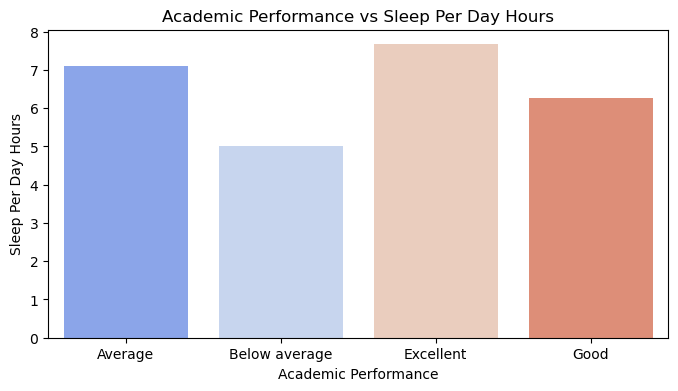

In [16]:
sleep_means = data.groupby('AcademicPerformance')['SleepPerDayHours'].mean()
sleep_std = data.groupby('AcademicPerformance')['SleepPerDayHours'].std()


plt.figure(figsize=(8, 4))
sns.barplot(x=sleep_means.index, y=sleep_means, palette='coolwarm', ci='sd')

plt.title('Academic Performance vs Sleep Per Day Hours')
plt.xlabel('Academic Performance')
plt.ylabel('Sleep Per Day Hours')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'AcademicPerformance', 'TakingNoteInClass', 'DepressionStatus', 'FaceChallangesToCompleteAcademicTask', 'LikePresentation', 'SleepPerDayHours', 'NumberOfFriend', 'LikeNewThings']

data[columns_to_encode] = data[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))


In [18]:
X = data.drop(['DepressionStatus'], axis=1)
y = data['DepressionStatus']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

scale.fit(X_train)

X_train_transform = scale.transform(X_train)
X_test_transform = scale.transform(X_test)

# Differents Model Use To Check Model Accuracy

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train_transform, y_train)

y_pred = model.predict(X_test_transform)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.60

Confusion Matrix:
[[1 2 0]
 [0 5 1]
 [1 4 6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.45      0.83      0.59         6
           2       0.86      0.55      0.67        11

    accuracy                           0.60        20
   macro avg       0.60      0.57      0.55        20
weighted avg       0.68      0.60      0.60        20



## Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_transform, y_train)

y_pred = rf_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.85

Confusion Matrix:
[[3 0 0]
 [0 6 0]
 [0 3 8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.85        20
   macro avg       0.89      0.91      0.88        20
weighted avg       0.90      0.85      0.85        20



## K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_transform, y_train)

y_pred = knn_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

K-Nearest Neighbors:
Accuracy: 0.65

Confusion Matrix:
[[3 0 0]
 [2 3 1]
 [3 1 7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.75      0.50      0.60         6
           2       0.88      0.64      0.74        11

    accuracy                           0.65        20
   macro avg       0.67      0.71      0.63        20
weighted avg       0.76      0.65      0.67        20



## Light Gradient Boosting Machine

In [25]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [26]:
import lightgbm as lgb

lgb_classifier = lgb.LGBMClassifier(random_state=42)

lgb_classifier.fit(X_train_transform, y_train)

y_pred = lgb_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nLightGBM:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 8
[LightGBM] [Info] Start training from score -1.479076
[LightGBM] [Info] Start training from score -0.731862
[LightGBM] [Info] Start training from score -1.233954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

C:\Users\ADMIN 4\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN 4\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ADMIN 4\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN 4\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

## SVM

In [27]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf',random_state=42)

svm_classifier.fit(X_train_transform, y_train)

y_pred = svm_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nSVM:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


SVM:
Accuracy: 0.70

Confusion Matrix:
[[2 1 0]
 [0 5 1]
 [0 4 7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      0.83      0.62         6
           2       0.88      0.64      0.74        11

    accuracy                           0.70        20
   macro avg       0.79      0.71      0.72        20
weighted avg       0.78      0.70      0.71        20



In [28]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)

DT_classifier.fit(X_train_transform, y_train)

y_pred = DT_classifier.predict(X_test_transform)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Decision Tree Classifier:
Accuracy: 0.85

Confusion Matrix:
[[3 0 0]
 [0 6 0]
 [0 3 8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.85        20
   macro avg       0.89      0.91      0.88        20
weighted avg       0.90      0.85      0.85        20

